In [50]:
from sklearn.datasets import make_blobs
import numpy as np
centers = [[-2.5, -2.5], [1.5, -1.5], [2.5, 2.5]]
X, y = make_blobs(n_samples=2000, centers=centers, cluster_std=1.8)
noise_strength = 0.5 
noise = np.random.normal(loc=0.0, scale=noise_strength, size=X.shape)
noise_y = np.random.randint(0, 1, size=y.shape)
X = X + noise
y = y + noise_y


/tmp/ipykernel_151235/449475319.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(np.unique(y)))


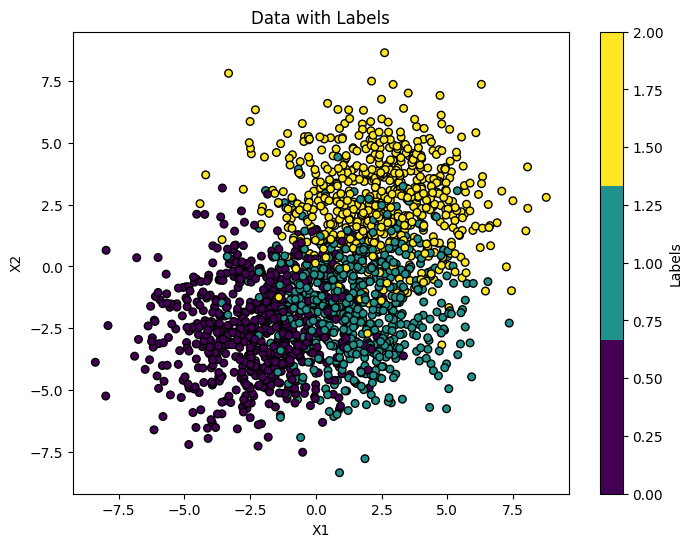

In [51]:
import matplotlib.pyplot as plt
import numpy as np
def plot_data(X, y):
    plt.figure(figsize=(8, 6))

    # Define colormap
    cmap = plt.cm.get_cmap('viridis', len(np.unique(y)))

    # Plot all points with colormap
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=30)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Data with Labels')
    plt.colorbar(label='Labels')
    plt.show()


plot_data(X, y)

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

# Define the network
class Net(nn.Module):
    def __init__(self, input_size=2, hidden_size_1=5, hidden_size_2=5, num_classes=3):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



Epoch [0/0], Loss: 0.0000


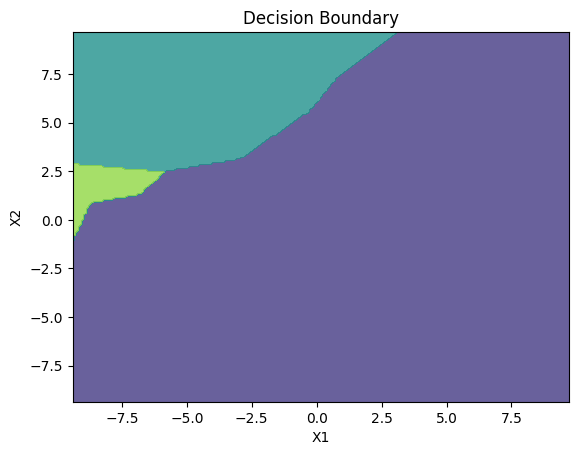

<a list of 3 PathCollection objects>


AttributeError: 'Path' object has no attribute 'get_color'

In [68]:

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    contours = plt.contourf(xx, yy, Z, alpha=0.8, levels=2)
    
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()
    print(contours.collections)
    answers = []
    for i in range(len(contours.collections)):
        answers.append(contours.collections[i].get_paths())
    print(answers[0][0].get_color())
# Convert the network to a callable function
def model(x):
    net.eval()
    with torch.no_grad():
        inputs = torch.tensor(x, dtype=torch.float32)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        return predicted.numpy()
    

    
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)



# Plot the decision boundary
print(f"Epoch [{0}/{0}], Loss: {0:.4f}")
plot_decision_boundary(X, y, model)
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    plot_decision_boundary(X, y, model)


In [ ]:
net.eval()
with torch.no_grad():
    outputs = net(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    print(f'Accuracy: {torch.sum(predicted == y_test_tensor).item() / y_test_tensor.size(0):.4f}')